In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=762a774f9c2e4adcbd757e05d242ce96


In [3]:
lats = np.random.uniform(-90.000, 90.000, size = 1500)
lngs = np.random.uniform(-180.000, 180.000, size = 1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zlitan
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | atar
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | narsaq
Processing Record 6 of Set 1 | chuy
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | salinopolis
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | eidsvag
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | chokurdakh
Processing Record 17 of Set 1 | bambanglipuro
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | amderma
City not found. Skipping...
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | illoqqortoormiut
City not found. 

Processing Record 39 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 40 of Set 4 | airai
Processing Record 41 of Set 4 | ust-bolsheretsk
City not found. Skipping...
Processing Record 42 of Set 4 | yellowknife
Processing Record 43 of Set 4 | tasiilaq
Processing Record 44 of Set 4 | svetlaya
Processing Record 45 of Set 4 | srednekolymsk
Processing Record 46 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 47 of Set 4 | iqaluit
Processing Record 48 of Set 4 | dawlatabad
Processing Record 49 of Set 4 | wulanhaote
City not found. Skipping...
Processing Record 50 of Set 4 | manaure
Processing Record 1 of Set 5 | port-gentil
Processing Record 2 of Set 5 | sabha
Processing Record 3 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 4 of Set 5 | bac lieu
Processing Record 5 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 6 of Set 5 | pangnirtung
Processing Record 7 of Set 5 | ende
Processing Record 8 of Set 5 | codrington


Processing Record 26 of Set 8 | inegol
Processing Record 27 of Set 8 | vengerovo
Processing Record 28 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 29 of Set 8 | kungurtug
Processing Record 30 of Set 8 | imbituba
Processing Record 31 of Set 8 | eyl
Processing Record 32 of Set 8 | tonj
Processing Record 33 of Set 8 | grasse
Processing Record 34 of Set 8 | taltal
Processing Record 35 of Set 8 | bukit bakri
City not found. Skipping...
Processing Record 36 of Set 8 | rogozno
Processing Record 37 of Set 8 | hazorasp
Processing Record 38 of Set 8 | barra patuca
Processing Record 39 of Set 8 | sheridan
Processing Record 40 of Set 8 | muyezerskiy
Processing Record 41 of Set 8 | labuan
Processing Record 42 of Set 8 | springbok
Processing Record 43 of Set 8 | lepenou
Processing Record 44 of Set 8 | rantepao
Processing Record 45 of Set 8 | jaipur hat
City not found. Skipping...
Processing Record 46 of Set 8 | tambopata
Processing Record 47 of Set 8 | mandera
Processing Rec

Processing Record 17 of Set 12 | norman wells
Processing Record 18 of Set 12 | murud
Processing Record 19 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 20 of Set 12 | bandrele
Processing Record 21 of Set 12 | labytnangi
Processing Record 22 of Set 12 | kisangani
Processing Record 23 of Set 12 | uvira
Processing Record 24 of Set 12 | guiratinga
Processing Record 25 of Set 12 | russell
Processing Record 26 of Set 12 | santa maria
Processing Record 27 of Set 12 | plomarion
Processing Record 28 of Set 12 | solwezi
Processing Record 29 of Set 12 | aykhal
Processing Record 30 of Set 12 | bagn
Processing Record 31 of Set 12 | marquette
Processing Record 32 of Set 12 | biysk
Processing Record 33 of Set 12 | longyearbyen
Processing Record 34 of Set 12 | golden
Processing Record 35 of Set 12 | northam
Processing Record 36 of Set 12 | sarangani
Processing Record 37 of Set 12 | san felipe
Processing Record 38 of Set 12 | king city
Processing Record 39 of Set 12 | churapch

In [7]:
print(len(city_data))

566


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zlitan,32.47,14.57,76.32,71,0,3.53,LY,2020-08-22 23:57:20
1,Butaritari,3.07,172.79,83.21,64,100,7.09,KI,2020-08-22 23:57:20
2,Atar,20.52,-13.05,98.10,21,63,2.51,MR,2020-08-22 23:56:11
3,Busselton,-33.65,115.33,53.01,86,39,9.08,AU,2020-08-22 23:57:20
4,Narsaq,60.92,-46.05,48.20,70,5,4.70,GL,2020-08-22 23:57:20
5,Chuy,-33.70,-53.46,46.26,71,0,6.69,UY,2020-08-22 23:57:20
6,Kodiak,57.79,-152.41,62.60,72,1,6.93,US,2020-08-22 23:57:20
7,Jamestown,42.10,-79.24,78.80,54,1,9.17,US,2020-08-22 23:53:34
8,Cape Town,-33.93,18.42,50.00,93,5,1.12,ZA,2020-08-22 23:55:53
9,Salinopolis,-0.61,-47.36,79.14,85,4,11.34,BR,2020-08-22 23:57:20


In [16]:
new_column_order = ["City", 'Country' , "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Zlitan,LY,2020-08-22 23:57:20,32.47,14.57,76.32,71,0,3.53
1,Butaritari,KI,2020-08-22 23:57:20,3.07,172.79,83.21,64,100,7.09
2,Atar,MR,2020-08-22 23:56:11,20.52,-13.05,98.10,21,63,2.51
3,Busselton,AU,2020-08-22 23:57:20,-33.65,115.33,53.01,86,39,9.08
4,Narsaq,GL,2020-08-22 23:57:20,60.92,-46.05,48.20,70,5,4.70
...,...,...,...,...,...,...,...,...,...
561,Visby,SE,2020-08-22 23:57:51,57.64,18.30,68.00,82,51,13.87
562,Ouallam,NE,2020-08-22 23:57:51,14.32,2.09,84.96,57,5,14.09
563,Saint-Louis,SN,2020-08-22 23:57:51,16.33,-15.00,87.80,62,97,4.70
564,Salisbury,GB,2020-08-22 23:53:24,51.07,-1.80,60.01,77,16,17.22


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1598185426.422204

In [26]:
today = time.strftime("%x")
today

'08/23/20'

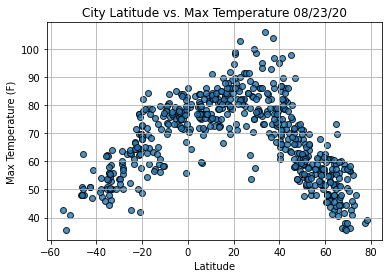

In [27]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

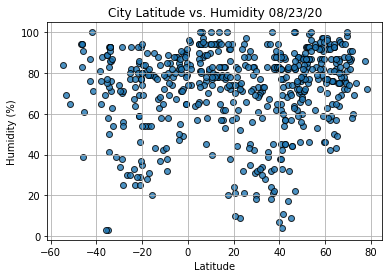

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

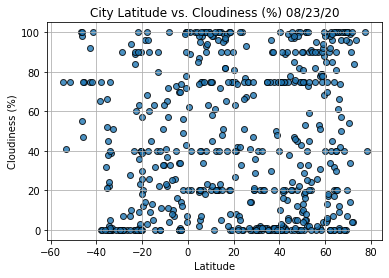

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

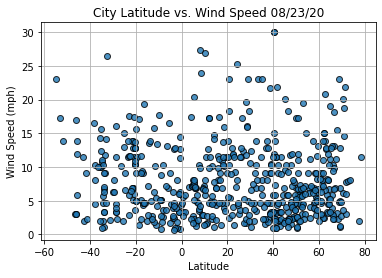

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [31]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [34]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [37]:
index13 = city_data_df.loc[13]
index13

City                      Eidsvag
Country                        NO
Date          2020-08-22 23:57:20
Lat                         62.78
Lng                          8.07
Max Temp                     55.4
Humidity                       93
Cloudiness                     96
Wind Speed                   20.8
Name: 13, dtype: object

In [38]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
561     True
562     True
563     True
564     True
565     True
Name: Lat, Length: 566, dtype: bool

In [44]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Zlitan,LY,2020-08-22 23:57:20,32.47,14.57,76.32,71,0,3.53
1,Butaritari,KI,2020-08-22 23:57:20,3.07,172.79,83.21,64,100,7.09
2,Atar,MR,2020-08-22 23:56:11,20.52,-13.05,98.10,21,63,2.51
4,Narsaq,GL,2020-08-22 23:57:20,60.92,-46.05,48.20,70,5,4.70
6,Kodiak,US,2020-08-22 23:57:20,57.79,-152.41,62.60,72,1,6.93


In [45]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

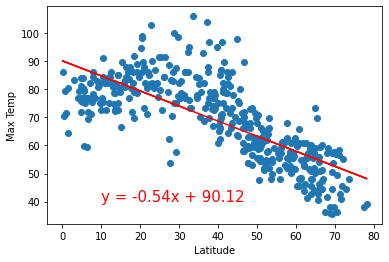

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

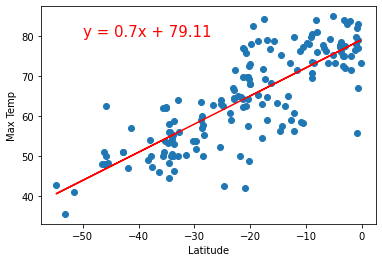

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,80))

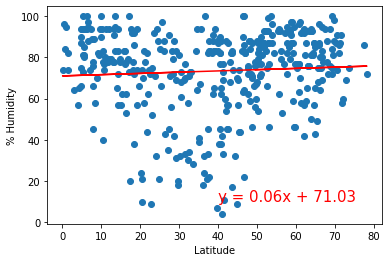

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

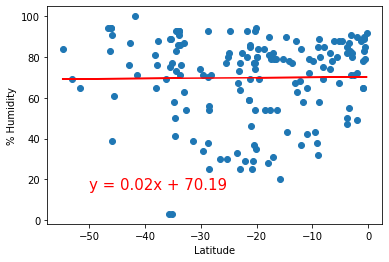

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

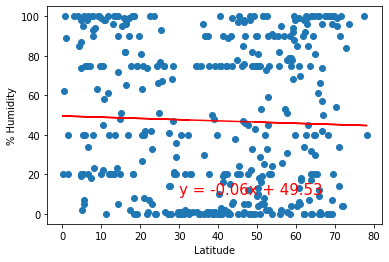

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Humidity',(30,10))

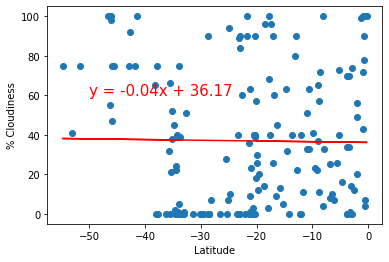

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

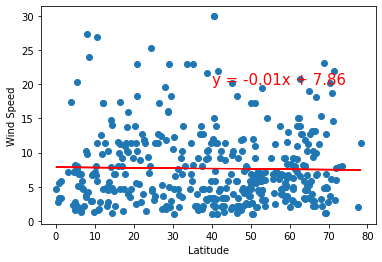

In [85]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,20))

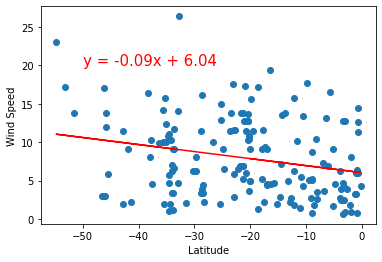

In [92]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \for Wind Speed', 'Wind Speed',(-50,20))